In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from common import set_plot_style, load_font, colors

In [2]:
ROOT_FOLDER = Path("/home/robin/projects/TEDx/")


images_dir = Path(ROOT_FOLDER / "output" / "images" / "ssp")
images_dir.mkdir(parents=True, exist_ok=True)

load_font()
set_plot_style()


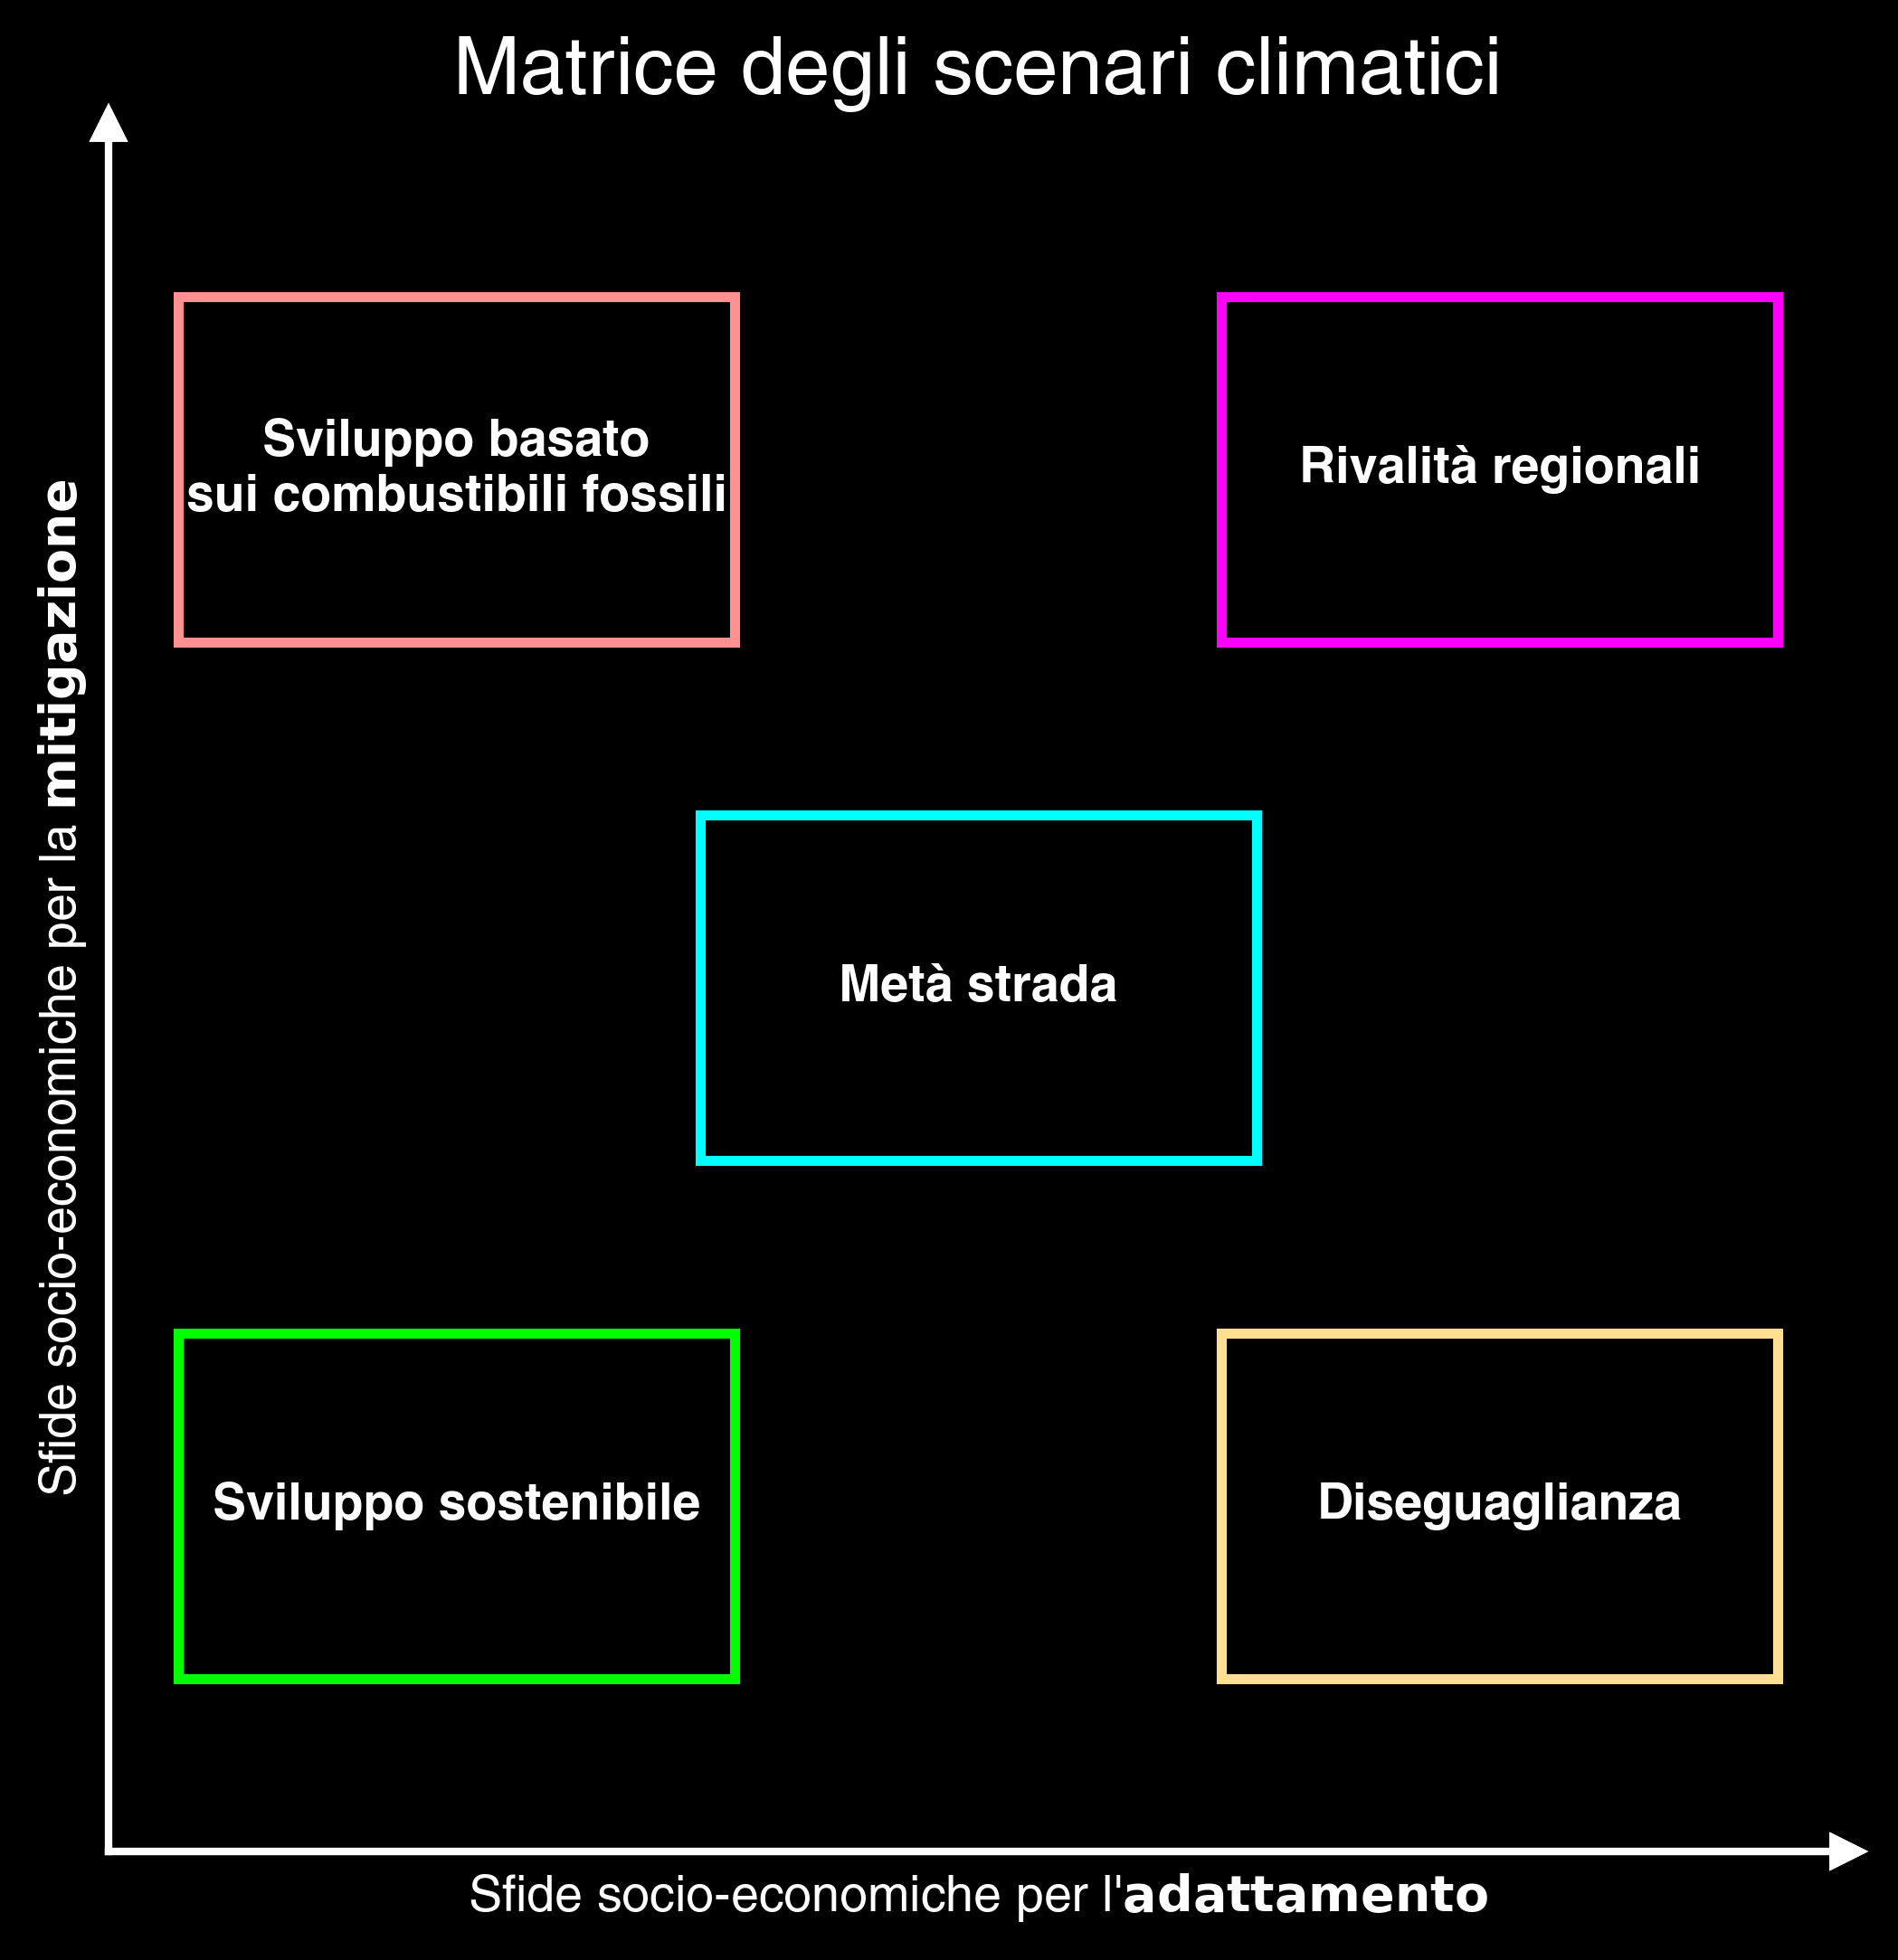

In [3]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6.2, 6.2))

# Define coordinates for each SSP
ssps = {
    "Sviluppo sostenibile": (1, 1),  # Low challenges for both
    "Metà strada": (2.5, 2.5),  # Medium challenges for both
    "Rivalità regionali": (4, 4),  # High challenges for both
    "Diseguaglianza": (4, 1),  # High adaptation, low mitigation
    "Sviluppo basato\nsui combustibili fossili": (
        1,
        4,
    ),  # Low adaptation, high mitigation
}

# Plot each SSP as a rectangle with text
for ssp, (x, y) in ssps.items():
    # Create rectangle
    rect_width = 1.6
    rect_height = 1
    rect = plt.Rectangle(
        (x - rect_width / 2, y - rect_height / 2),
        rect_width,
        rect_height,
        facecolor="black",
        edgecolor=colors[ssp.replace("\n", " ")],
        linewidth=2,
    )
    ax.add_patch(rect)
    # Add text in rectangle center
    ax.text(x, y, ssp, horizontalalignment="center", verticalalignment="center", weight="bold")

# Customize axes
ax.set_xlabel("Sfide socio-economiche per l'" + r"$\bf{adattamento}$")
ax.set_ylabel("Sfide socio-economiche per la " + r"$\bf{mitigazione}$")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add arrow heads and lines (only bottom and left)
ax.plot((0, 5), (0, 0), "w-", clip_on=False)  # Bottom line
ax.plot((5, 5), (0, 0), "w>", clip_on=False)  # Bottom arrow
ax.plot((0, 0), (0, 5), "w-", clip_on=False)  # Left line
ax.plot((0, 0), (5, 5), "w^", clip_on=False)  # Left arrow

# Remove ticks but keep labels
ax.set_xticks([])
ax.set_yticks([])

ax.set_title("Matrice degli scenari climatici")

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
fig.savefig(images_dir / "ssp_scenarios.svg")